# K-nearest Neighbors

- K-Nearest is a non paramatric machine learning model in which the model memorizes the traning observation for classifiying the
unseen test data.
- It can also be called instance based learning.
- This model is often termed as lazy learning, as it does not learn anvthing during the traning phase like regression, random forest, so on.
- Instead it starts working only during the testing/evaluation phase to compare the given test observation with nearest training observation, which will
 take significant time in comparing each test data point.
- Hence, this technique is not efficient on big data, alos performance does deteriorate when the number of variables high due to the
curse of dimesionality.


# KNN Voter Example

Objective is to predict the party for whcih  voter will vote based on their neighborhood, precisely geolocation(latitude and )
- Here we assume that we can identify the potential voter to which political party they would be voting based on majority voters
 did voted for that particular party in that region, so that they have high probabality to vote for the majority party.
- However, tuning k-value(number to be consider, among which majority should be counted) is the million dollar question.


# Curse Of Dimensionality

In [2]:
import numpy as np
import pandas as pd
import random,math

- The Following code generates random numbers between zero and one from uniform distribution with the givin dimesion, which is equivalent of length of array or list

In [4]:
def random_point_gen(dimension):
    return [random.random() for _ in range(dimension)]

- The Following function caculates random root mean sum of squares of Eucliden distances(2-norm) between points by taking the difference
between points and sum of the squares and finally takes square root of total distance.

In [6]:
def distance(v,w):
    vec_sub = [v_i-w_i for v_i, w_i in zip(v,w)]
    sum_of_sqrs = sum(v_i*v_i for v_i in vec_sub)
    return math.sqrt(sum_of_sqrs)


Both dimension and number of pairs are utilized for calculating the distances with the following code:

In [7]:
def random_distances_comparison(dimension,number_pairs):
    return [distance(random_point_gen(dimension),random_point_gen(dimension))
           for _ in range(number_pairs)]

In [8]:
def mean(x):
    return sum(x) / len(x)

- Experiment has been done by changing dimensions from 1 to 201 with the increase of 5 dimensions to check the increase in distance:

In [9]:
dimeansions = range(1,201,5)

Both minimum and average distances have been calculated to check,however, both illustrate the similar story:

In [10]:
avg_distances = []
min_distances = []

In [11]:
dummarray = np.empty((20,4))
dist_vals = pd.DataFrame(dummarray)

In [12]:
dist_vals

,0,1,2,3
0,0.000000e+00,7.480531e-315,3.033563e-321,NaN
1,3.162514e+180,8.421681e+106,8.728822e+227,2.940841e-144
2,2.857608e+161,6.705758e+247,4.075771e+93,6.363240e+151
3,9.305375e+199,6.465783e+170,8.335675e+106,4.256897e-96
4,4.506220e-144,1.705881e+272,2.281767e+243,5.235844e-143
5,2.872900e+257,2.875182e+161,8.515151e-96,3.984728e+252
6,3.959708e+257,1.128568e+277,4.271485e+180,1.175228e+214
7,2.875051e+161,8.515151e-96,1.487760e-76,1.049171e-142
8,8.436549e+252,7.554990e+106,2.602187e+251,5.280356e+256
9,9.748226e-144,9.311152e+242,4.516066e-144,3.936128e-62


In [21]:
import random,math

def random_point_gen(dimension):
    return [random.random() for _ in range(dimension)]

def distance(v,w):
    vec_sub = [v_i-w_i for v_i,w_i in zip(v,w)]
    sum_of_sqrs = sum(v_i*v_i for v_i in vec_sub)
    return math.sqrt(sum_of_sqrs)

def random_distances_comparison(dimension,number_pairs):
    return [distance(random_point_gen(dimension),random_point_gen(dimension))
            for _ in range(number_pairs)]

def mean(x):
    return sum(x) / len(x)

dimensions = range(1, 201, 5)

avg_distances = []
min_distances = []


dummyarray = np.empty((20,4))
dist_vals = pd.DataFrame(dummyarray)
dist_vals.columns = ["Dimension","Min_Distance","Avg_Distance","Min/Avg_Distance"]

random.seed(34)
i = 0
for dims in dimensions:
    distances = random_distances_comparison(dims, 1000)  
    avg_distances.append(mean(distances))    
    min_distances.append(min(distances))     
    
    dist_vals.loc[i,"Dimension"] = dims
    dist_vals.loc[i,"Min_Distance"] = min(distances)
    dist_vals.loc[i,"Avg_Distance"] = mean(distances)
    dist_vals.loc[i,"Min/Avg_Distance"] = min(distances)/mean(distances)
                 
    print(dims, min(distances), mean(distances), min(distances)*1.0 / mean(distances))
    i = i+1


1 0.0011310312795327349 0.3304377974569266 0.003422826590169872
6 0.13408376385196982 0.9718366726979907 0.13796944241641917
11 0.6174961838009708 1.3428297800724869 0.4598469537722331
16 0.690723555518616 1.5916756747360146 0.43395998725253815
21 1.145299809744623 1.8606501665486392 0.6155374236034196
26 1.3491108338575342 2.05939278034058 0.655101273898037
31 1.5306814775223596 2.2575232751731726 0.6780357457909011
36 1.6495694595386121 2.4368760200852035 0.6769197308121306
41 1.8131615499536435 2.620080307069328 0.692025181465427
46 1.9887669978961435 2.7625945084356123 0.7198910270122604
51 2.079213166546753 2.89338869628594 0.7186083118440697
56 2.2542679491328115 3.04103478287079 0.7412831848653645
61 2.43171126047381 3.1837540168385114 0.7637874181273951
66 2.567853662815102 3.2946307081057804 0.7794056118330382
71 2.7064177084028915 3.4335738927751285 0.788221775013403
76 2.7550984355940185 3.5609023888328744 0.773707935447518
81 2.9832566405962075 3.6705963579722676 0.81274440

In [23]:
dist_vals

,Dimension,Min_Distance,Avg_Distance,Min/Avg_Distance
0,1.0,0.001131,0.330438,0.003423
1,6.0,0.134084,0.971837,0.137969
2,11.0,0.617496,1.342830,0.459847
3,16.0,0.690724,1.591676,0.433960
4,21.0,1.145300,1.860650,0.615537
5,26.0,1.349111,2.059393,0.655101
6,31.0,1.530681,2.257523,0.678036
7,36.0,1.649569,2.436876,0.676920
8,41.0,1.813162,2.620080,0.692025
9,46.0,1.988767,2.762595,0.719891


# Ploting Average Distance for various dimeansions

In [24]:
import matplotlib.pyplot as plt

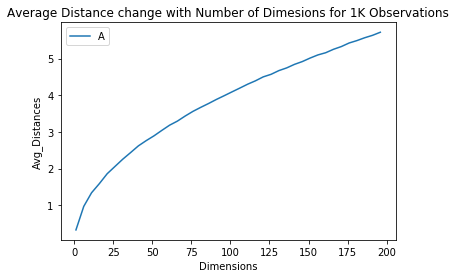

In [32]:
plt.Figure()
plt.title('Average Distance change with Number of Dimesions for 1K Observations')
plt.xlabel('Dimensions')
plt.ylabel('Avg_Distances')
plt.plot(dist_vals["Dimension"],dist_vals["Avg_Distance"])
plt.legend('Avg_Distance')
plt.show()

- From the preceding graph, it is proved that with the increase in dimesions, mean distance increase logarithmically.
- Hence the higher the dimensions, the more data is needed to overcome the curse of dimensionality.

# Curse of Dimensionality with 1D,2D, and 3D example

- A quick analysis has been done to see how distance 60 random points are expending with the increase in dimensionality.
- Initially random points are drawn for one-dimension

In [46]:
# 1-dimension
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

one_d_date = np.random.rand(60,1)

one_d_date_df = pd.DataFrame(one_d_date)
one_d_date_df.columns = ["1D_Data"]
one_d_date_df["height"] = 1
one_d_date_df

,1D_Data,height
0,0.317911,1
1,0.630575,1
2,0.256822,1
3,0.178717,1
4,0.637708,1
5,0.643130,1
6,0.888945,1
7,0.982921,1
8,0.269559,1
9,0.619864,1


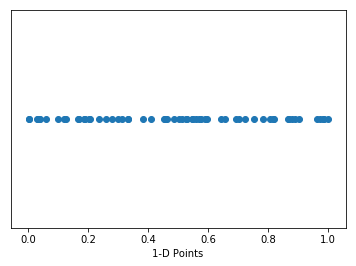

In [45]:
plt.figure()
plt.scatter(one_d_date_df['1D_Data'],one_d_date_df["height"])
plt.yticks([])
plt.xlabel("1-D Points")
plt.show()

- Here we are repeating the same experiment in 2D space, by takeing 60 random numbers with x and y co-ordinate space and plotted them visually



In [50]:
#2_d Dimensiona Plot

two_d_data = np.random.rand(60,2)
two_d_data_df = pd.DataFrame(two_d_data)
two_d_data_df.columns = ["x_axis","y_axis"]
two_d_data_df

,x_axis,y_axis
0,0.739639,0.147132
1,0.944076,0.336747
2,0.724381,0.741617
3,0.755966,0.494819
4,0.667921,0.538605
5,0.901846,0.395067
6,0.108974,0.228614
7,0.472745,0.177900
8,0.398884,0.171815
9,0.586128,0.830260


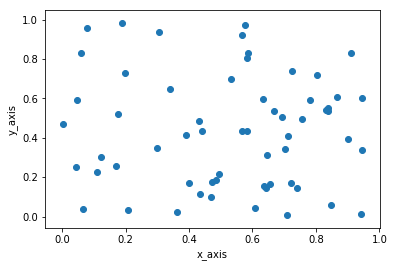

In [54]:
plt.figure()
plt.scatter(two_d_data_df['x_axis'],two_d_data_df["y_axis"])
plt.xlabel("x_axis")
plt.ylabel("y_axis")
plt.show()


- By observing the 2D graph we can see that more gaps have been appearing for the same 60 data points.

In [58]:
#3D-Dimension

three_d_data = np.random.rand(60,3)
three_d_data_df = pd.DataFrame(three_d_data)
three_d_data_df.columns = ["x_axis","y_axis","z_axis"]
three_d_data_df

,x_axis,y_axis,z_axis
0,0.044662,0.613480,0.919864
1,0.917573,0.018266,0.334051
2,0.402543,0.885276,0.012669
3,0.431065,0.554554,0.205017
4,0.816311,0.323910,0.760146
5,0.994744,0.542844,0.361944
6,0.339773,0.903821,0.332098
7,0.610235,0.310308,0.720245
8,0.413714,0.465364,0.018485
9,0.523375,0.010164,0.522516


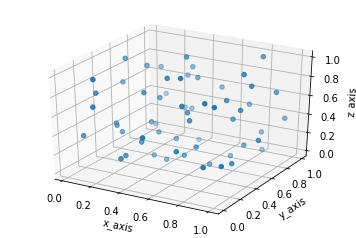

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(three_d_data_df['x_axis'],three_d_data_df["y_axis"],three_d_data_df["z_axis"])
ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('z_axis')
plt.show()


# KNN Classifier with breast cancer Wisconsin data example

- Breast cencer data has been utilized from UCI machine learing repository for project purpose.
- Here the task is to find whether the cencer is maglignant or bengin based on various collected features such as clump thiclness and so on using the KNN classifier.

In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report



import os
os.chdir("C:\\Users\\Panu\\Downloads\\9781788295758_Code\\StatisticsforMachineLearning_Code\\Chapter05")


In [71]:
breast_cancer = pd.read_csv("Breast_Cancer_Wisconsin.csv")

In [75]:
breast_cancer.columns = ["ID_Number","Clump_Thickness","Unif_Cell_Size","Unif_Cell_Shape","Marg_Adhesion","Single_Epith_Cell_Size","Bare_Nuclei","Bland Chromatin","Normal_Nucleoli","Mitoses","Class"]

In [78]:
breast_cancer.head()

,ID_Number,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marg_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


- The Above are the first few rows to show how the data look like. The Class value has  class 2 and 4. Value 2 and 4 represent bening
and malignant class, respectively.
- Whereas all the other variables do vary between value 1 and 10, which are very much categorical in nature

# Only the Bare_Nuclei variable has some missing values, here we are replacing them with the most frequent value(categoy value 1) in the following code

In [91]:
breast_cancer['Bare_Nuclei'] = breast_cancer['Bare_Nuclei'].replace('?',np.NAN)
breast_cancer['Bare_Nuclei'] = breast_cancer['Bare_Nuclei'].fillna(breast_cancer['Bare_Nuclei'].value_counts().index[0])

# Following code to convert the classes to a 0 and 1 indicator for using in the classifier

In [94]:
breast_cancer['Cancer_Ind'] = 0
breast_cancer.loc[breast_cancer['Class']==4,'Cancer_Ind'] =1

In [95]:
breast_cancer.head()

,ID_Number,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marg_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland Chromatin,Normal_Nucleoli,Mitoses,Class,Cancer_Ind
0,1002945,5,4,4,5,7,10,3,2,1,2,0
1,1015425,3,1,1,1,2,2,3,1,1,2,0
2,1016277,6,8,8,1,3,4,3,7,1,2,0
3,1017023,4,1,1,3,2,1,3,1,1,2,0
4,1017122,8,10,10,8,7,10,9,7,1,4,1


# In the Following code, we are droping non-value added variable from analysis:

In [99]:
x_vars = breast_cancer.drop(['ID_Number','Class','Cancer_Ind'], axis = 1)

In [101]:
y_var = breast_cancer['Cancer_Ind']

# Data Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

In [105]:
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)
x_vars_stdscle

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.20709025,  0.28273919,  0.26572479, ..., -0.17979494,
        -0.28486086, -0.34418721],
       [-0.50322422, -0.7007423 , -0.74412585, ..., -0.17979494,
        -0.61242739, -0.34418721],
       [ 0.56224749,  1.59404784,  1.61219231, ..., -0.17979494,
         1.35297178, -0.34418721],
       ...,
       [ 0.20709025,  2.24970216,  2.28542607, ...,  1.87080747,
         2.33567136,  0.23892607],
       [-0.14806699,  1.59404784,  0.93895855, ...,  2.69104844,
         1.02540525, -0.34418721],
       [-0.14806699,  1.59404784,  1.61219231, ...,  2.69104844,
         0.37027219, -0.34418721]])

# Train and Test data

In [107]:
from sklearn.model_selection import train_test_split

# As KNN is very sensitive to distance, here we are standardizing all the columns before applying algorithms

In [108]:
x_vars_stdscle_df = pd.DataFrame(x_vars_stdscle,index=x_vars.index,columns=x_vars.columns)

In [111]:
x_vars_stdscle_df.head()


,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marg_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland Chromatin,Normal_Nucleoli,Mitoses
0,0.207090,0.282739,0.265725,0.767385,1.708465,1.798001,-0.179795,-0.284861,-0.344187
1,-0.503224,-0.700742,-0.744126,-0.633883,-0.550074,-0.411514,-0.179795,-0.612427,-0.344187
2,0.562247,1.594048,1.612192,-0.633883,-0.098366,0.140864,-0.179795,1.352972,-0.344187
3,-0.148067,-0.700742,-0.744126,0.066751,-0.550074,-0.687704,-0.179795,-0.612427,-0.344187
4,1.272562,2.249702,2.285426,1.818335,1.708465,1.798001,2.280928,1.352972,-0.344187


In [112]:
x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle_df,y_var,train_size = 0.7, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# - KNN classifier is begin applied with neighbor value of 3 and p value indicates it is 2-norm, also known as Eucliden distance for computing classes.


In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn_fit = KNeighborsClassifier(n_neighbors = 3, p=2,metric='minkowski')

# model fit on knn

In [114]:
knn_fit.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [123]:
print("\nK-Nearest Neighbor - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames=["Actuall"],colnames=["Predicted"]))

print("\nK-Nreast Neighbors - Train Accuracy:",round(accuracy_score(y_train,knn_fit.predict(x_train)),3))

print("\nK-Nearest Neighbores - Test Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

print("\nK-Neighbores - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames=["Actuall"],colnames=["predicted"]))

print("\K-Neighbores - Test Accuracy:", round(accuracy_score(y_test,knn_fit.predict(x_test)),3))

print("\nK-Nearest Neighbores - Classification Report", classification_report(y_test,knn_fit.predict(x_test)))


K-Nearest Neighbor - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          314    8
1            4  162

K-Nreast Neighbors - Train Accuracy: 0.975

K-Nearest Neighbores - Test Classification Report
              precision    recall  f1-score   support

          0       0.99      0.98      0.98       322
          1       0.95      0.98      0.96       166

avg / total       0.98      0.98      0.98       488


K-Neighbores - Test Confusion Matrix

 predicted    0   1
Actuall           
0          131   4
1            1  74
\K-Neighbores - Test Accuracy: 0.976

K-Nearest Neighbores - Classification Report              precision    recall  f1-score   support

          0       0.99      0.97      0.98       135
          1       0.95      0.99      0.97        75

avg / total       0.98      0.98      0.98       210



- From the results, it is appearing that KNN is working very well in classifing maglignant and bening classes well, obtaining test accuracy
of 97.6% with 96 of recall on maglignant class.

- The only deficiency of KNN classifier would be it is compuatationally intensive duraing test phase, as each test observation
will be compared with all the available observations in training data, which practically KNN does not learn a thing from traing data.

Hence, we are also calling it a lazy classifier.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Tuning of k-value in KNN classifier

In [128]:
# Tuning of K- value for Train & Test data
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]

k_vals = [1,2,3,4,5]
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(x_train,y_train)

    print ("\nK-value",k_vals[i])
    
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(x_train)),3)
    print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train,knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )     
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(x_train)))

    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(x_test)),3)    
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test)))
    
    k_valchart.loc[i, 'K_value'] = k_vals[i]      
    k_valchart.loc[i, 'Train_acc'] = tr_accscore     
    k_valchart.loc[i, 'Test_acc'] = ts_accscore               




K-value 1

K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          322    0
1            0  166

K-Nearest Neighbors - Train accuracy: 1.0

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       322
          1       1.00      1.00      1.00       166

avg / total       1.00      1.00      1.00       488



K-Nearest Neighbors - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          132   3
1            4  71

K-Nearest Neighbors - Test accuracy: 0.967

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.97      0.98      0.97       135
          1       0.96      0.95      0.95        75

avg / total       0.97      0.97      0.97       210


K-value 2

K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          322    

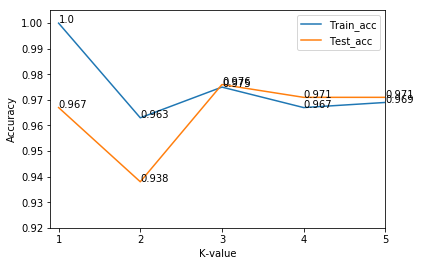

In [125]:
# Ploting accuracies over varied K-values
import matplotlib.pyplot as plt
plt.figure()
#plt.title('KNN Train & Test Accuracy change with K-value')

plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["K_value"],k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"],k_valchart["Test_acc"])

plt.axis([0.9,5, 0.92, 1.005])
plt.xticks([1,2,3,4,5])

for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)

for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
    
plt.legend(loc='upper right')    

plt.show()






- It appears that with less value of k-vale, it has more overfitting problem due to the very high value of accuracy on train data and less on test data.
- with the increase in k-value more the train and test accuracies are converging and becoming more robust.
